In [1]:
import numpy as np
import pandas as pd

In [2]:
import MySQLdb

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.simplefilter("ignore")

In [5]:
class Data:
    def __init__(self, table_name):
        self.__filename = table_name
        with open("D:/github_projects/login.txt") as file:
            self.__myserver_config = file.read().split(",") #config data for SQL server
            
        connect = MySQLdb.connect(*self.__myserver_config)
        cursor = connect.cursor()
        query = "SELECT * FROM titanium_pure"
        self.__data = pd.read_sql(query, connect, index_col="id")
        
        connect.close()

        self.change_types()

    
    def change_types(self):
        self.__data = self.__data.replace("None", np.nan)
        for elem in ["Density", "Х", "У", "Scanning_spot"]:
            self.__data[elem] = self.__data[elem].str.replace(",", ".")
            self.__data[elem] = self.__data[elem].astype(np.float32)
            
        
    @property
    def data(self):
        return self.__data


    @property
    def y(self):
        return self.__data["Density"]

    @property
    def X(self):
        return self.__data.drop("Density", axis=1)


    
    
    def __str__(self):
        return str(self.data)

    def __repr__(self):
        return str(self.data) 

In [82]:
class Visualisation:
    def __init__(self, data):
        self.__df = data.data
        
    def show_distribution(self, *columns, show_all=False):
        if not show_all:
            for column in columns:
                ax = sns.histplot(self.__df[column])
                bins = ax.patches
                heights = [patch.get_height() for patch in bins]
                bin_edges = [patch.get_x() for patch in bins]
                plt.scatter(bin_edges, heights, c="r")
                plt.plot(bin_edges, heights, "r")
                plt.show()
        else:
            for column in self.__df.columns:
                ax = sns.histplot(self.__df[column])
                bins = ax.patches
                heights = [patch.get_height() for patch in bins]
                bin_edges = [patch.get_x() for patch in bins]
                plt.scatter(bin_edges, heights, c="r")
                plt.plot(bin_edges, heights, "r")
                plt.show()

    def pairplot(self, *args, **kwargs):
        sns.pairplot(*args, **kwargs, data=self.__df)

    def 
        

In [29]:
data1 = Data("titanium_pure")

In [83]:
V = Visualisation(data1)

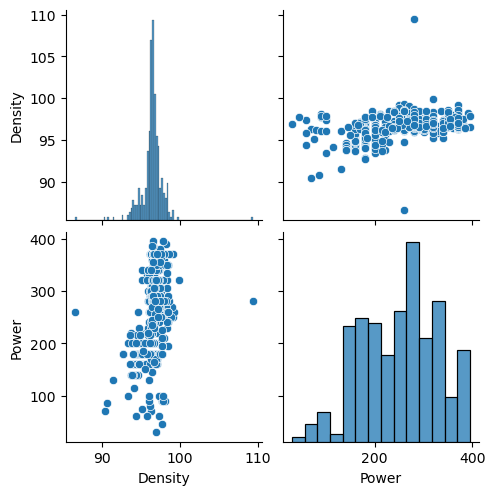

In [89]:
V.pairplot(vars=["Density", "Power"])